In [1]:
import sys
import os

# Get the absolute path of the project root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Add the project root directory to the Python path
sys.path.append(project_root)

In [2]:
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Define the path to the data directory
data_dir = os.path.join(project_root, 'data')

# Example: Access a specific data file in the data directory
data_file_path = os.path.join(data_dir, 'MAR_per_OAR_for_patients.csv')
df = pd.read_csv(data_file_path)

data = df[['95HD', 'VolDice', 'SurfDist','JaccardIndex', 'APL', 'FNPL', 'FNV', 'OAR', 'patient', 'MAR']]


In [3]:
from AutoML.analyzer import AutoMLAnalyzer

analyzer = AutoMLAnalyzer(data, target_variable='MAR', output_dir='./analysis_output')

analyzer.run()

Mapping file not found checking for outliers in categorical variables...
  - No Outliers found in OAR
  - No Outliers found in patient
╒═════════════════════════╤════════════════╤═══════════╤═════════════════╕
│                         │                │ Missing   │ Overall         │
╞═════════════════════════╪════════════════╪═══════════╪═════════════════╡
│ n                       │                │           │ 380             │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ 95HD, mean (SD)         │                │ 0         │ 6.2 (21.9)      │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ VolDice, mean (SD)      │                │ 0         │ 0.8 (0.1)       │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ SurfDist, mean (SD)     │                │ 0         │ 1.3 (1.9)       │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ JaccardIndex, mean (SD) │             

In [4]:
from AutoML.trainer import AutoMLSupervised

In [5]:
trainer = AutoMLSupervised(task='regression', search='random', cv=2, config_path='/home/oem/Documents/CDI/AutoML/configs/config.yaml')

In [6]:
trainer.fit(data, 'MAR', exclude=['OAR', 'patient',], stratify_on='OAR', n_iter=2)

Event rates: 3.721 (train) 3.664 (test)
Train/test: 304/76

Iterating search through 2 hyperparameters for linr.

Iterating search through 2 hyperparameters for linr_pen.

Iterating search through 8640 hyperparameters for boost_r.

Iterating search through 2520 hyperparameters for rf_r.

Iterating search through 960 hyperparameters for tree_r.

Iterating search through 40 hyperparameters for svr.

Iterating search through 30 hyperparameters for knn_r.


<< linr_pen >> -- took 0.00301s to refit.
+------------------------+-------------+------------+
|         Metric         | Train Score | Test Score |
+------------------------+-------------+------------+
| neg_mean_squared_error |   -0.4160   |  -0.5326   |
|           r2           |   0.0662    |   0.0233   |
+------------------------+-------------+------------+
<< linr >> -- took 0.00180s to refit.
+------------------------+-------------+------------+
|         Metric         | Train Score | Test Score |
+------------------------+-------------+------------+
| neg_mean_squared_error |   -0.4160   |  -0.5326   |
|           r2           |   0.0662    |   0.0233   |
+------------------------+-------------+------------+
<< knn_r >> -- took 0.00120s to refit.
+------------------------+-------------+------------+
|         Metric         | Train Score | Test Score |
+------------------------+-------------+------------+
| neg_mean_squared_error |   -0.1381   |  -0.7821   |
|           r2   

In [7]:
trainer.best_models

{'linr_pen': LinearRegression(),
 'linr': LinearRegression(),
 'knn_r': KNeighborsRegressor(n_neighbors=8, p=1, weights='distance'),
 'svr': SVR(C=0.1, gamma='auto'),
 'tree_r': DecisionTreeRegressor(max_depth=6, max_features='sqrt', min_samples_leaf=4),
 'rf_r': RandomForestRegressor(criterion='friedman_mse', max_depth=7,
                       max_features='sqrt', min_samples_split=4,
                       n_estimators=512, oob_score=True),
 'boost_r': GradientBoostingRegressor(criterion='squared_error', learning_rate=0.001,
                           max_depth=7, max_features='log2', min_samples_leaf=2,
                           n_estimators=3125, subsample=0.75)}

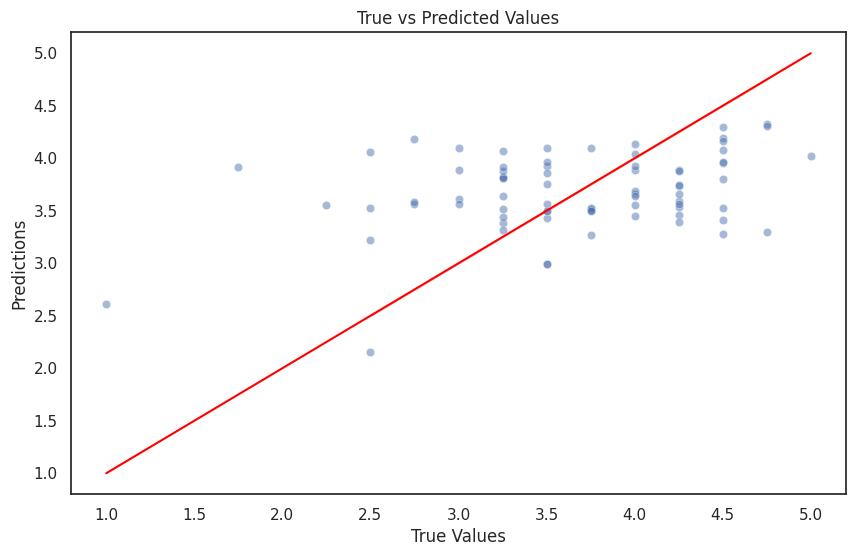

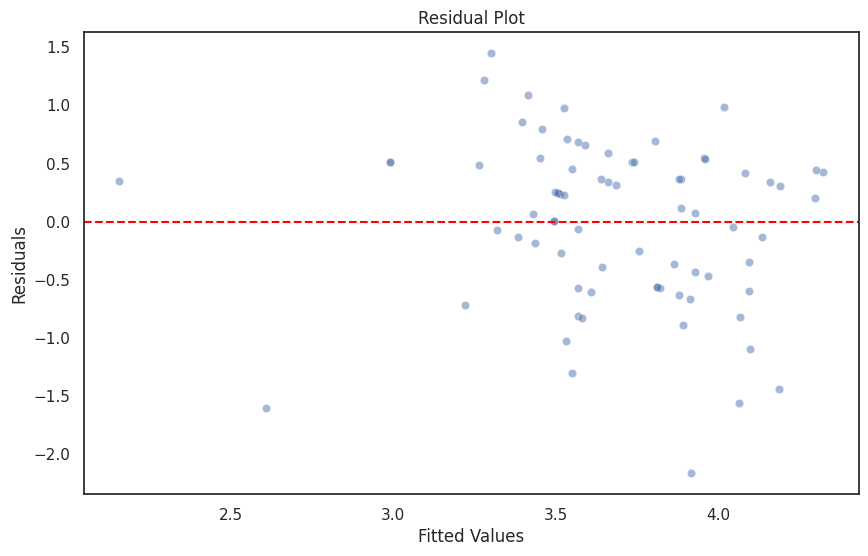

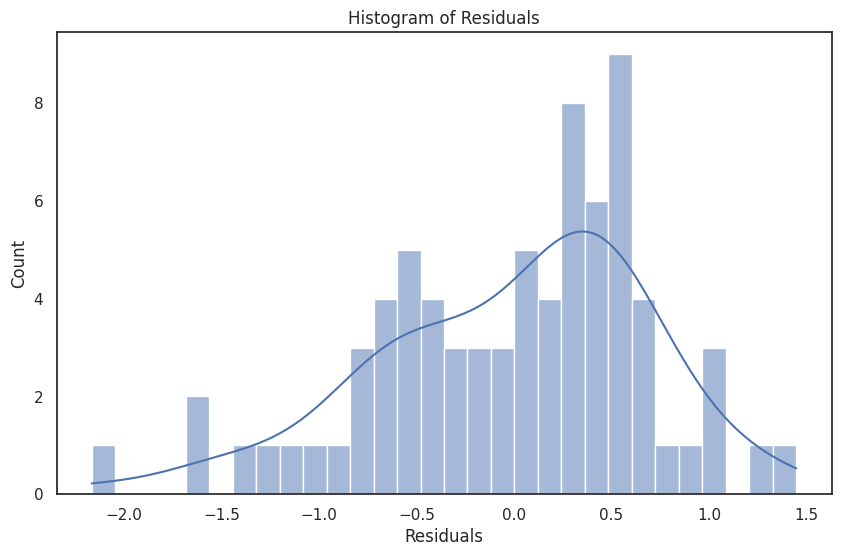

In [8]:
trainer.plot_results()